Found 92 rows for exam periods.


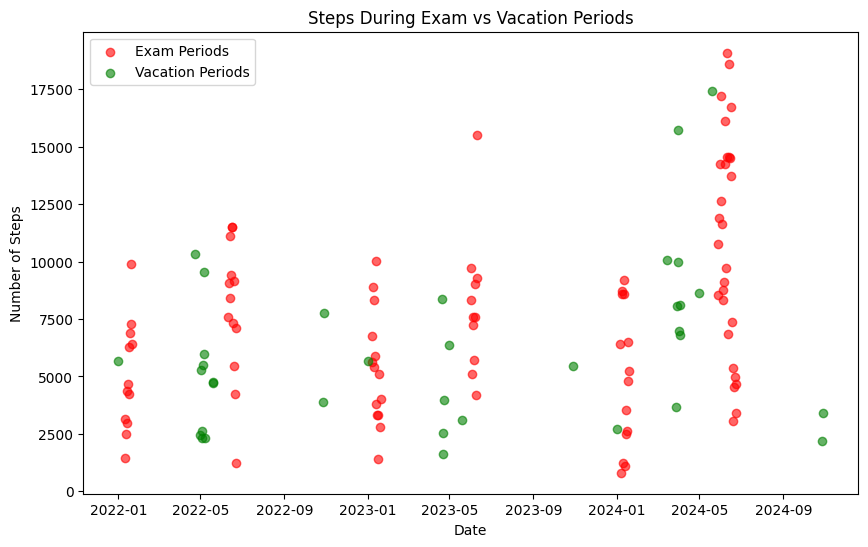

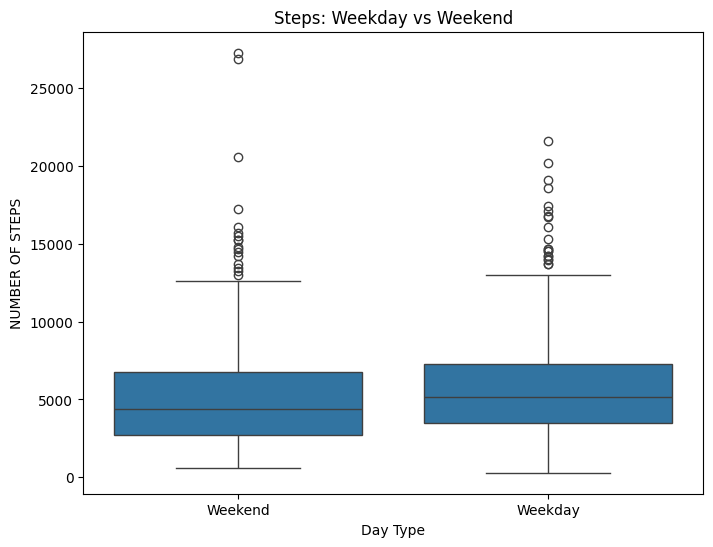

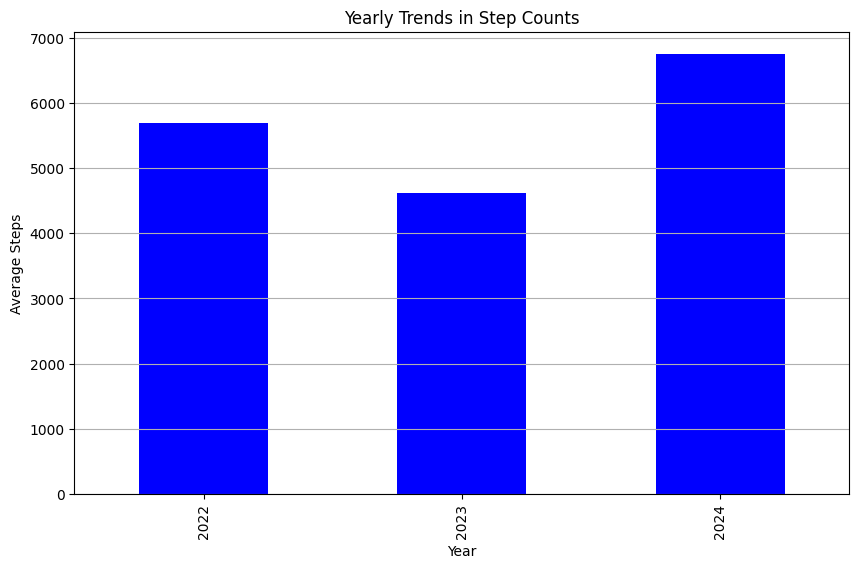

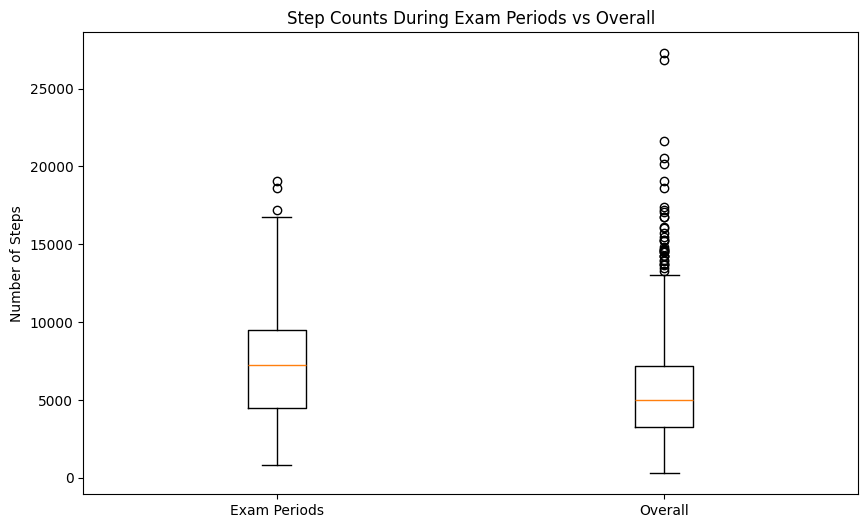

Analysis complete. Visualizations saved.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load datasets
steps_data = pd.read_excel("NUMBER OF STEPS DSA 210.xlsx", sheet_name="Sayfa1")
academic_calendar = pd.read_excel("Academic calendar for 2022-2025.xlsx", sheet_name="Sayfa1")

# Convert date columns to datetime
steps_data['DATES'] = pd.to_datetime(steps_data['DATES'], format='%d-%m-%Y')
academic_calendar['Start date'] = pd.to_datetime(academic_calendar['Start date'], format='%d-%m-%Y')
academic_calendar['End Date'] = pd.to_datetime(academic_calendar['End Date'], format='%d-%m-%Y')

# Merge datasets based on date intervals
merged_data = pd.DataFrame()
merged_data['DATES'] = steps_data['DATES']
merged_data['NUMBER OF STEPS'] = steps_data['NUMBER OF STEPS']

# Assign periods from academic calendar to step data based on intervals
merged_data['Period'] = 'Other'
for _, row in academic_calendar.iterrows():
    mask = (merged_data['DATES'] >= row['Start date']) & (merged_data['DATES'] <= row['End Date'])
    merged_data.loc[mask, 'Period'] = row['Event']

# Add weekday/weekend column
merged_data['Day Type'] = merged_data['DATES'].dt.weekday.apply(lambda x: 'Weekend' if x >= 5 else 'Weekday')

# Add year column
merged_data['Year'] = merged_data['DATES'].dt.year

# Adjust period filtering for exam and vacation periods
exam_period_labels = [label for label in academic_calendar['Event'].unique() if 'Final exam periods' in label]
vacation_period_labels = ['Spring Break', 'National Holiday', 'New year holiday']

exam_period_data = merged_data[merged_data['Period'].isin(exam_period_labels)]
vacation_period_data = merged_data[merged_data['Period'].isin(vacation_period_labels)]

# Check if exam periods are correctly identified
if exam_period_data.empty:
    print("No data found for exam periods. Please check the academic calendar for correct labeling.")
else:
    print(f"Found {len(exam_period_data)} rows for exam periods.")

# 1. Exam Periods vs Vacation Periods: Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(exam_period_data['DATES'], exam_period_data['NUMBER OF STEPS'], color='red', label='Exam Periods', alpha=0.6)
plt.scatter(vacation_period_data['DATES'], vacation_period_data['NUMBER OF STEPS'], color='green', label='Vacation Periods', alpha=0.6)
plt.title('Steps During Exam vs Vacation Periods')
plt.xlabel('Date')
plt.ylabel('Number of Steps')
plt.legend()
plt.savefig("scatter_exam_vs_vacation.png")
plt.show()

# 2. Weekday vs Weekend: Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Day Type', y='NUMBER OF STEPS', data=merged_data)
plt.title('Steps: Weekday vs Weekend')
plt.savefig("boxplot_weekday_vs_weekend.png")
plt.show()

# 3. Yearly Trends: Histogram
plt.figure(figsize=(10, 6))
merged_data.groupby('Year')['NUMBER OF STEPS'].mean().plot(kind='bar', color='blue')
plt.title('Yearly Trends in Step Counts')
plt.xlabel('Year')
plt.ylabel('Average Steps')
plt.grid(axis='y')
plt.savefig("histogram_yearly_trends.png")
plt.show()

# 4. Exam Periods: Steps Decrease Analysis
if not exam_period_data.empty:
    plt.figure(figsize=(10, 6))
    plt.boxplot(
        [exam_period_data['NUMBER OF STEPS'].dropna(), merged_data['NUMBER OF STEPS'].dropna()],
        tick_labels=['Exam Periods', 'Overall']  # Updated parameter name
    )
    plt.title('Step Counts During Exam Periods vs Overall')
    plt.ylabel('Number of Steps')
    plt.savefig("boxplot_exam_vs_overall.png")
    plt.show()

# Save preprocessed data
merged_data.to_csv('preprocessed_steps_data.csv', index=False)

print("Analysis complete. Visualizations saved.")
